## Testing the best models

In [9]:
import pandas as pd
from joblib import load
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the models
best_mlp = load('mlp_grid_search.joblib')
best_svm = load('svm_grid_search.joblib')

In [11]:
# Load the test data from a CSV file
test_data = pd.read_csv('test_data.csv')

# Separate the features and the true labels
X_test = test_data.drop('True_Label', axis=1)
y_test = test_data['True_Label']

In [12]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,True_Label
0,1.490802,0.997075,-1.013566,0.378336,0.288433,-0.851655,1.457158,-0.717768,1.341739,0.099559,0.937882,1
1,-0.272949,0.997075,-1.013566,0.305091,-0.131284,-0.503362,0.006489,-0.440936,1.023360,0.286147,0.582758,1
2,0.314968,0.997075,-1.013566,1.660125,0.520382,0.541517,-0.846504,-0.517834,2.547029,1.460548,0.550474,0
3,-0.272949,0.997075,-1.013566,0.414959,0.906963,-0.503362,0.041305,0.374184,1.318997,0.725175,1.389859,1
4,0.902885,-1.002933,0.986616,0.378336,-0.296961,0.541517,1.532593,0.574119,-0.795947,0.736151,0.615042,1


In [13]:
# Make predictions with the MLP model
mlp_predictions = best_mlp.predict(X_test)

# Make predictions with the SVM model
svm_predictions = best_svm.predict(X_test)

In [14]:
# calculate the accuracy, compare the predictions with the true labels
from sklearn.metrics import accuracy_score

mlp_accuracy = accuracy_score(y_test, mlp_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Multilayer Perceptron Model's Accuracy: {mlp_accuracy:.2f}")
print(f"Support Vector Machines Model's Accuracy: {svm_accuracy:.2f}")

Multilayer Perceptron Model's Accuracy: 0.97
Support Vector Machines Model's Accuracy: 0.94


## Visualizing

In [15]:
bank_data = pd.read_csv('bank_data.csv')

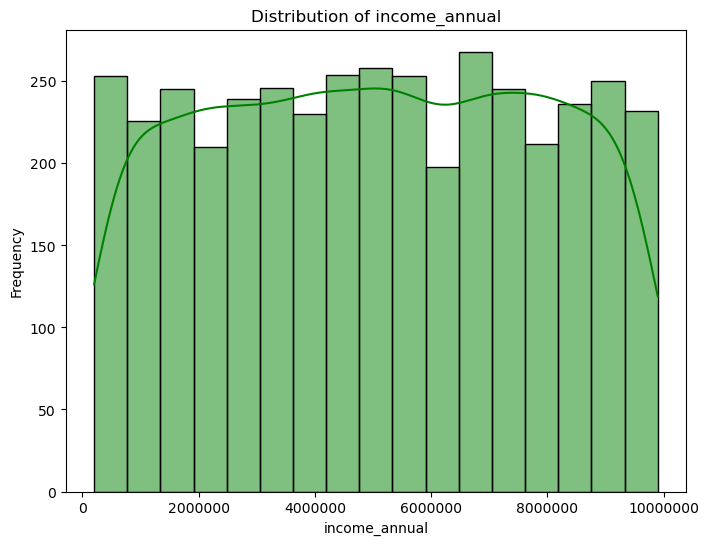

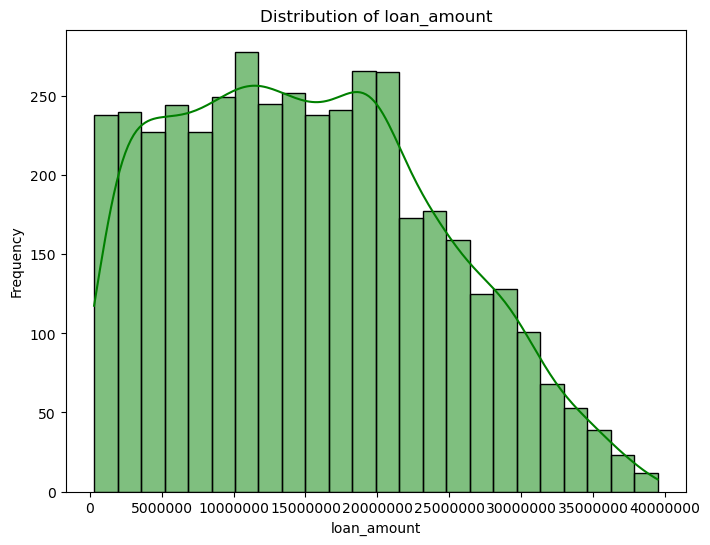

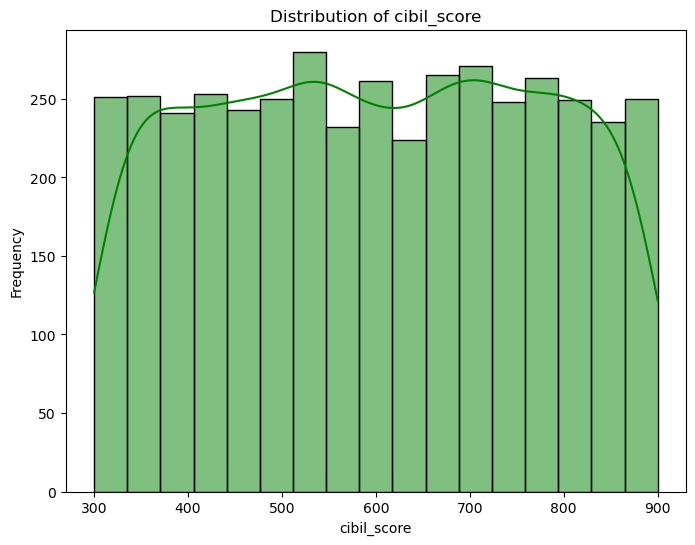

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
numerical_vars = ['income_annual', 'loan_amount', 'cibil_score']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(data=bank_data, x=var, kde=True, color='green')
    ax.ticklabel_format(style='plain', axis='x')  # Disable scientific notation
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
